In [33]:
#import necessary libraries
import ipywidgets as widgets
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from xml.dom import minidom

import numpy as np
from scipy import interpolate
import pylab as pl

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np

np.set_printoptions(threshold=np.inf)

#initializations
init_notebook_mode(connected=True)

In [34]:
#import data
filename = '20180808_Test_2'
# filename = '20180622_Test_2'
findLabel = 'Packet'
SensorData = None
time = 0

#import xml-file
xDoc = minidom.parse(filename + ".xml")
allListitems = xDoc.getElementsByTagName(findLabel) 

for s in allListitems:
    if SensorData is None:
        SensorData = s.attributes['Samples'].value.split(',')
    else:
        SensorData = np.append(SensorData, s.attributes['Samples'].value.split(','))

#import csv-file
ForceData = pd.read_csv(filename + ".csv",delimiter=',')
# column_cssj = column_cssj.set_index("State", drop = False)

In [35]:
len(SensorData)

1890

In [36]:
len(ForceData["cssj"][1:])

2408

In [37]:
#create sliders
timemult = widgets.FloatSlider(
    value=0.393,
    min=0.390,
    max=0.400,
    step=0.001,
    continuous_update = False)

valuemult = widgets.FloatSlider(
    value=55,
    min=1,
    max=200,
    step=1,
    continuous_update = False)

valueoffset = widgets.FloatSlider(
    value=1900,
    min=1000,
    max=3000,
    step=5,
    continuous_update = False)

timeoffset = widgets.FloatSlider(
    value=0,
    min=-10,
    max=10,
    step=0.1,
    continuous_update = False)

#create figure
figure = {
    'data': [],
    'layout': {},
    #'frames': [],
}

In [38]:
def update_plot(timemult,valuemult,valueoffset,timeoffset):
    #assign data
    trace1 = go.Scattergl(
        x = np.linspace(0, (len(SensorData)-1)/10, num=len(SensorData)),
        y = SensorData,
        name =" Sensor Data",
        mode = 'line',
        marker = dict(
        color = 'blue',
#         line = dict(width = 1)
    )
        )

    trace2 = go.Scattergl(
        x =  ForceData['cstm']*timemult+timeoffset,
        y =  ForceData['cssj']*valuemult+valueoffset,
        name = "Force Data",
         mode = 'line',
        marker = dict(
        color = 'red',
#         line = dict(width = 1)
    )
        )
    
    figure['data'] =[trace1,trace2]
    
    #set layout
    figure['layout'] = {
        'title': 'Data',
            'xaxis': {'title': 'Time [s]'},
            'yaxis': {'title': 'Sensor Data (mV)'}}
    
    #draw plot
    iplot(figure, filename='axes-booleans')

In [39]:
 traceN = go.Scattergl(
        x =  ForceData['cstm'],
        y =  ForceData['cssj'],
        name = "Force Data",
         mode = 'line',
        marker = dict(
        color = 'red',
#         line = dict(width = 1)
    )
        )

figureN = {
    'data': []
}
figureN['data'] =[traceN]
    #draw plot
iplot(figureN, filename='axes-booleans')

In [40]:
ForceData['cssj'].index(min(ForceData['cssj']))

TypeError: 'RangeIndex' object is not callable

In [41]:
ForceData["cssj"]

0        0.00
1        0.00
2       12.49
3       12.49
4       12.47
5       12.20
6       12.15
7       12.15
8       12.11
9       12.13
10      12.15
11      12.13
12      12.15
13      12.11
14      12.11
15      12.13
16      12.15
17      12.13
18      12.62
19      13.16
20      13.34
21      13.41
22      13.52
23      13.61
24      13.86
25      14.01
26      14.22
27      14.35
28      14.55
29      14.57
        ...  
2379    13.36
2380    13.14
2381    13.05
2382    12.74
2383    12.67
2384    12.58
2385    12.47
2386    12.45
2387    12.45
2388    12.13
2389    11.91
2390    11.86
2391    11.80
2392    11.86
2393    11.93
2394    11.68
2395    11.30
2396    11.17
2397    11.01
2398    11.03
2399    11.15
2400    10.94
2401    10.72
2402    10.59
2403    10.29
2404    10.20
2405    10.25
2406    10.07
2407     9.82
2408     9.79
Name: cssj, Length: 2409, dtype: float64

In [42]:
len(ForceData["cstm"]//1.272)

2409

In [43]:
len(ForceData["cstm"][1:len(ForceData["cstm"]//1.272)].values.astype(float)*1.272)

2408

In [44]:
len(ForceData["cssj"][1:].values)

2408

In [65]:
widgets.interactive(update_plot,timemult=timemult,valuemult=valuemult,valueoffset=valueoffset,timeoffset=timeoffset)

interactive(children=(FloatSlider(value=0.395, continuous_update=False, description='timemult', max=0.4, min=0…

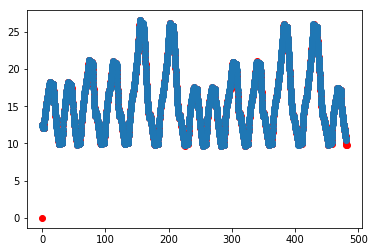

In [47]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
import numpy as np
from scipy import interpolate
import pylab as pl
 
x = ForceData["cstm"][1:].values
y = ForceData["cssj"][1:].values

xnew = ForceData["cstm"][1:len(SensorData)].values.astype(float)*1.272
pl.plot(x,y,"ro")
 
f=interpolate.interp1d(x,y)
ynew=f(xnew)
pl.plot(xnew,ynew,'o')
pl.show()

In [64]:
    #assign data
trace0 = go.Scattergl(
        x = ynew[0:],
        y = SensorData[7:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data = [trace0]

iplot(data, filename='scatter')

In [58]:
trace0 = go.Scattergl(
        x = ynew[0:],
        y = SensorData[7:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data2 = [trace0,trace0]

layout2=dict(
            title='Anime Test', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

M = (len(SensorData)-7)//10
x2 = ynew[0::10]
y2 = SensorData[7::10]
frames2=[dict(data=[dict(x=[x2[k]], 
                        y=[y2[k]], 
                        mode='markers', 
                        marker=dict(color='red', size=10)
                        )
                  ]) for k in range(M)]  

# steps = []
# for i in range(len(data)):
#     step = dict(
#         method = 'restyle',  
#         args = ['visible', [False] * len(data)],
#     )
#     step['args'][1][i] = True # Toggle i'th trace to "visible"
#     steps.append(step)

# sliders = [dict(
#     active = 10,
#     currentvalue = {"prefix": "Frequency: "},
#     pad = {"t": 50},
#     steps = steps
# )]
# layout = dict(sliders=sliders)
# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='Sine Wave Slider')

figure2 = dict(data=data2, layout=layout2, frames=frames2)
iplot(figure2, filename='Animation')